# Module 5 - Projectile Motion

<img src="https://upload.wikimedia.org/wikipedia/commons/2/2e/Uss_iowa_bb-61_pr.jpg" width=600px>

## Goals

- Solve second order differential equations using coupled first order equations
- Predict projectile motion behavior with realistic effects such as drag


## Setting up the Notebook

In [2]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
#plt.style.use('notebook');
%config InlineBackend.figure_format = 'retina'

## Second Order Equations

Until now we have solved Newton's 2nd law for the velocity, i.e. we only  had to consider the 1st order ordinary differential equation:

\begin{equation}
\frac{dv}{dt} = \frac{F}{m}.
\end{equation}

However, what if we want the position $x(t)$ as a funciton of time? Newton's law is second order: 
\begin{equation}
\frac{d^2 x}{dt^2} = \frac{F}{m}.
\end{equation}

It turns out that we can still directly apply the Euler method at the cost of having two **coupled** ordinary differential equations

\begin{align}
\frac{d^2 x}{dt^2} &= \frac{dv}{dt} = \frac{F}{m} \\
\frac{d x}{dt} &= v
\end{align}

We can then apply the forward approximation of the derivative two both equations:
\begin{align}
x_{n+1} &= x_{n} + v_{n}\Delta t \\
v_{n+1} &= v_{n} + \frac{F}{m} \Delta t
\end{align}
which can be simultaneously iterated from a known initial condition $(x_0,v_0)$ at time $t=0$. 

## Trajectory of a Cannon Shell

The above equations are defined for one dimension, but they can be trivially extended to $d$ dimensions where we have $2d$ iterative equations.  Consider a cannon which shoots a projectile of mass $m$ at an initial angle $\theta_0$ with velocity $v_0$.  For simplicity we will choose the $x$ axis to be aligned with the cannon.

The vector form of Newton's second law is:

\begin{align}
m \frac{d \vec{v}}{d t} &= \vec{F}_{\rm g} + \vec{F}_{\rm drag} \\
&= -m g \hat{y} - B_2 v^2 \hat{v}
\end{align}

In order to decompose this into scalar equations in the $x$ and $y$ directions, we note that:

\begin{equation}
v = \sqrt{v_x^2 + v_y^2}
\end{equation}

and 

\begin{equation}
\hat{v} = \frac{v_x}{v} \hat{x} + \frac{v_y}{v} \hat{y}
\end{equation}

thus we have:

\begin{align}
\frac{dv_x}{dt} &= - \frac{B_2}{m} v_x \sqrt{v_x^2 + v_y^2} \\
\frac{dv_y}{dt} &= -g - \frac{B_2}{m} v_y \sqrt{v_x^2 + v_y^2} \\
\end{align}

and

\begin{align}
\frac{dx}{dt} &= v_x \\
\frac{dy}{dt} &= v_y . \\
\end{align}

#### Question: How do we know when the projectile has hit the ground?

<div class="span alert alert-success">
<h2> Team Programming challenge </h2>
Find the trajectory that a cannon ball would take if the initial projectile velocity is $v_0 = 500~\rm{m/s}$. Compare the solutions for the ideal case vs including air friction.
</div>

(0, 30)

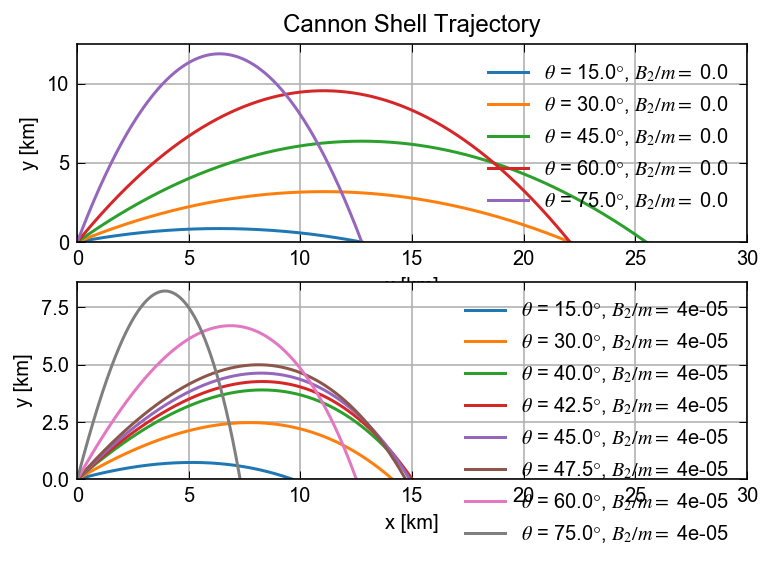

In [3]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.constants import g,pi

# the time step
dt = 0.01 # s

# initial velocity
v0 = 500 # m/s

# angle step
dtheta = 0.01 # radians

# Iterate the Euler equations for the positions, only storing the x and y
# coordinates until we have a 'hit'
# hint: check out the docs for numpy.append and consider using while loops

plt.figure()

ax1 = plt.subplot(2,1,1) # use subplots to put more than one graph in the same plot

# drag coeeficient divided by mass
B2oMass = 0.0
for theta in (15, 30, 45, 60, 75):
    theta = np.radians(theta) # radians
    x = np.array([0.0])
    y = np.array([0.0])
    vx = v0 * np.cos(theta) 
    vy = v0 * np.sin(theta) 

    while y[-1] >= 0.0:
        v = np.sqrt(vx**2 + vy**2)
        vx -= B2oMass * v * vx * dt
        vy -= g*dt + B2oMass * v * vy * dt
        x = np.append(x,x[-1] + vx*dt)
        y = np.append(y,y[-1] + vy*dt)
    # Plot the resulting trajectory
    ax1.plot(x/1.0E3,y/1.0E3,'-',label=r'$\theta$ = {0:2.1f}$\degree$, $B_2/m =$ {1}'.format(np.degrees(theta), B2oMass))

# Example of setting the 'current' plot properties
plt.xlabel('x [km]')
plt.ylabel('y [km]')
plt.legend()
plt.grid(True)
plt.ylim(0.0)
plt.xlim((0,30))
plt.title('Cannon Shell Trajectory')

ax2 = plt.subplot(2,1,2)
B2oMass = 4.0E-5 # 1/m
for theta in (15, 30, 40, 42.5, 45, 47.5, 60, 75):
    theta = np.radians(theta) # radians
    x = np.array([0.0])
    y = np.array([0.0])
    vx = v0 * np.cos(theta) 
    vy = v0 * np.sin(theta) 

    while y[-1] >= 0.0:
        v = np.sqrt(vx**2 + vy**2)
        vx -= B2oMass * v * vx * dt
        vy -= g*dt + B2oMass * v * vy * dt
        x = np.append(x,x[-1] + vx*dt)
        y = np.append(y,y[-1] + vy*dt)
    # Plot the resulting trajectory
    plt.plot(x/1.0E3,y/1.0E3,'-',label=r'$\theta$ = {0:2.1f}$\degree$, $B_2/m =$ {1}'.format(np.degrees(theta), B2oMass))

# Example of specifically setting the properties of subplot ax2
ax2.set_xlabel('x [km]')
ax2.set_ylabel('y [km]')
ax2.legend()
ax2.grid(True)
ax2.set_ylim(0)
ax2.set_xlim((0,30))

<div class="span alert alert-success">
<h2> Team Programming challenge </h2>
Find the intial angle that leads to a sucessful hit of a target 13.5 km away with a width of $50~\rm{m}$ if the initial projectile velocity is $v_0 = 500~\rm{m/s}$.  How much does this differ from that needed for the exact solution when $B_2 = 0$?
</div>

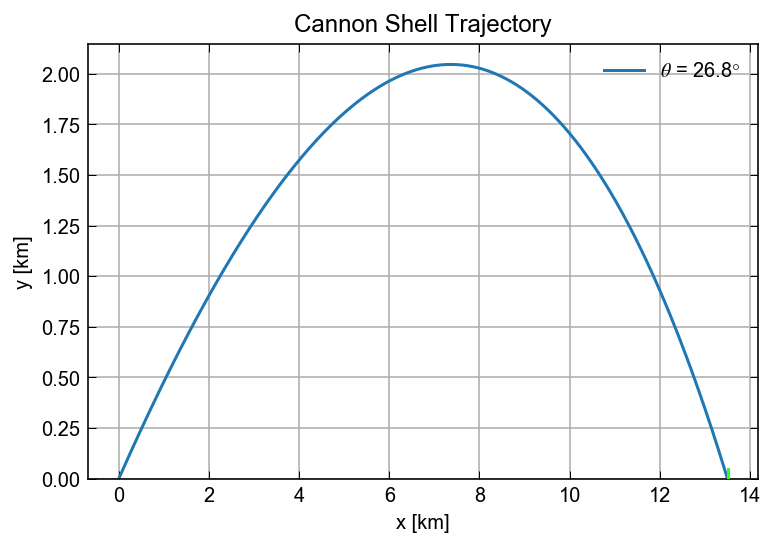

In [4]:
import matplotlib.patches as patches
from scipy.constants import g,pi

# drag coeeficient divided by mass
#B2oMass = 0.0 # 1/m
B2oMass = 4.0E-5 # 1/m

# the time step
dt = 0.01 # s

# initial velocity
v0 = 500 # m/s

# initial angle
theta = np.radians(5.0) # radians

# angle step
dtheta = 0.001 # radians

# Iterate the Euler equations for the positions, only storing the x and y
# coordinates until we have a 'hit'
# hint: check out the docs for numpy.append and consider using while loops

plt.figure()
xmin,xmax = 13.5E3,13.55E3
x = np.array([0.0])
while not (xmin < x[-1] < xmax):
    x = np.array([0.0])
    y = np.array([0.0])
    theta += dtheta
    vx = v0 * np.cos(theta) 
    vy = v0 * np.sin(theta) 

    while y[-1] >= 0.0:
        v = np.sqrt(vx**2 + vy**2)
        vx -= B2oMass * v * vx * dt
        vy -= g*dt + B2oMass * v * vy * dt
        x = np.append(x,x[-1] + vx*dt)
        y = np.append(y,y[-1] + vy*dt)
        
    if x[-1] > xmax:
        print('Too Far!')
        break

# Plot the resulting trajectory
ax1 = plt.subplot(111)
ax1.plot(x/1.0E3,y/1.0E3,'-',label=r'$\theta$ = {0:2.1f}$\degree$'.format(np.degrees(theta)))
ax1.add_patch(patches.Rectangle((13.5, 0.0),0.05,0.05,facecolor='#39FF14',edgecolor='None',zorder=10))

# set the x and y labels and a title
plt.xlabel('x [km]')
plt.ylabel('y [km]')
plt.legend()
plt.grid(True)
plt.title('Cannon Shell Trajectory')

# Only show positive y-coordinates
plt.axis(ymin=0.0);

## What about variable air resistance?
Air density, and therefore the drag force, depend on multiple factors such as altitude and temperature. A simple model for the dependence of air density on altitude is based on the ideal gas isothermal approximation. In this approximation, the atmospheric pressure at a height $y$ (based on a reference point such as sea level) is given by the relation

\begin{equation}
    p(y) = p(0)e^{-mgy/k_B T}
\end{equation}

where $m$ is the average mass of an air molecule, $k_B$ is Boltzmann's constant, and $T$ is the absolute temperature. For an ideal gas the pressure is proportional to the density, and therefore we can write the density as

\begin{equation}
    \rho(y) = \rho_0e^{-y/y_0}
\end{equation}

where $\rho_0$ is the density at sea level ($y=0$) and $y_0=k_B T/mg \approx 1.0 \times 10^4$ m.

(0, 20)

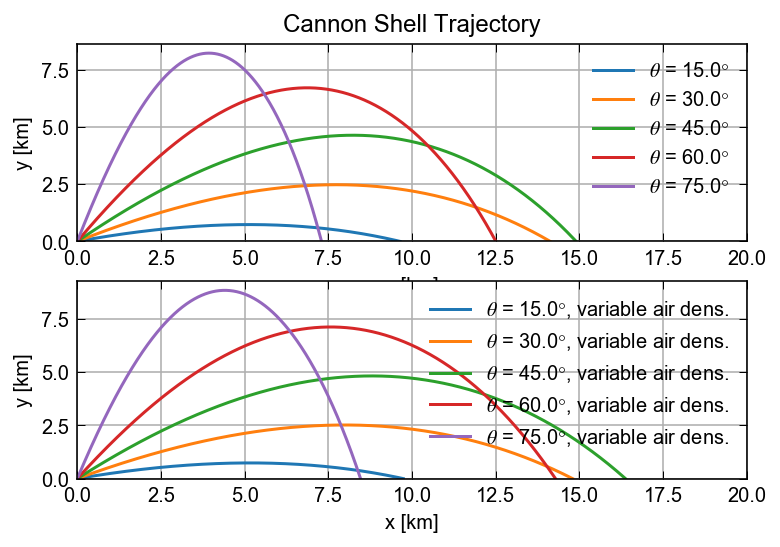

In [5]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.constants import g,pi

# the time step
dt = 0.01 # s

# initial velocity
v0 = 500 # m/s

# Iterate the Euler equations for the positions, only storing the x and y
# coordinates until we have a 'hit'
# hint: check out the docs for numpy.append and consider using while loops

plt.figure()

ax1 = plt.subplot(2,1,1) # use subplots to put more than one graph in the same plot

# drag coeeficient divided by mass
B2oMass = 4.0E-5
for theta in (15, 30, 45, 60, 75):
    theta = np.radians(theta) # radians
    x = np.array([0.0])
    y = np.array([0.0])
    vx = v0 * np.cos(theta) 
    vy = v0 * np.sin(theta) 

    while y[-1] >= 0.0:
        v = np.sqrt(vx**2 + vy**2)
        vx -= B2oMass * v * vx * dt
        vy -= g*dt + B2oMass * v * vy * dt
        x = np.append(x,x[-1] + vx*dt)
        y = np.append(y,y[-1] + vy*dt)
    # Plot the resulting trajectory
    ax1.plot(x/1.0E3,y/1.0E3,'-',label=r'$\theta$ = {0:2.1f}$\degree$'.format(np.degrees(theta)))

# Example of setting the 'current' plot properties
plt.xlabel('x [km]')
plt.ylabel('y [km]')
plt.legend()
plt.grid(True)
plt.ylim(0.0)
plt.xlim((0,20))
plt.title('Cannon Shell Trajectory')

ax2 = plt.subplot(2,1,2)
B2oMass = 4.0E-5 # 1/m
y0 = 1E4
for theta in (15, 30, 45, 60, 75):
    theta = np.radians(theta) # radians
    x = np.array([0.0])
    y = np.array([0.0])
    vx = v0 * np.cos(theta) 
    vy = v0 * np.sin(theta) 

    while y[-1] >= 0.0:
        v = np.sqrt(vx**2 + vy**2)
        vx -= B2oMass * np.exp(-y[-1]/y0) * v * vx * dt
        vy -= g*dt + B2oMass * np.exp(-y[-1]/y0) * v * vy * dt
        x = np.append(x,x[-1] + vx*dt)
        y = np.append(y,y[-1] + vy*dt)
    # Plot the resulting trajectory
    plt.plot(x/1.0E3,y/1.0E3,'-',label=r'$\theta$ = {0:2.1f}$\degree$, variable air dens.'.format(np.degrees(theta)))

# Example of specifically setting the properties of subplot ax2
ax2.set_xlabel('x [km]')
ax2.set_ylabel('y [km]')
ax2.legend()
ax2.grid(True)
ax2.set_ylim(0)
ax2.set_xlim((0,20))

Too Far!


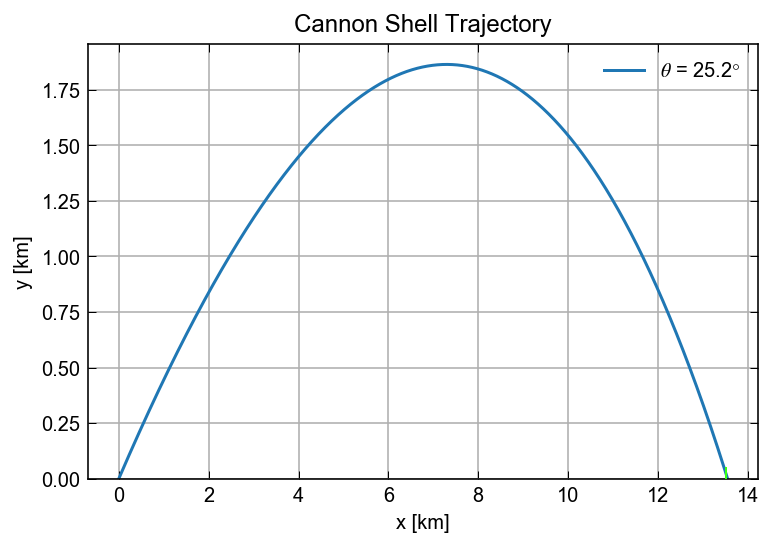

In [6]:
import matplotlib.patches as patches
from scipy.constants import g,pi

# drag coeeficient divided by mass
B2oMass = 4.0E-5 # 1/m

# the time step
dt = 0.01 # s

# initial velocity
v0 = 500 # m/s

# initial angle
theta = np.radians(20.0) # radians

# angle step
dtheta = 0.01 # radians

# Iterate the Euler equations for the positions, only storing the x and y
# coordinates until we have a 'hit'
# hint: check out the docs for numpy.append and consider using while loops

plt.figure()
xmin,xmax = 13.5E3,13.55E3
x = np.array([0.0])
y0 = 1E4
while not (xmin < x[-1] < xmax):
    x = np.array([0.0])
    y = np.array([0.0])
    theta += dtheta
    vx = v0 * np.cos(theta) 
    vy = v0 * np.sin(theta) 

    while y[-1] >= 0.0:
        v = np.sqrt(vx**2 + vy**2)
        vx -= B2oMass * np.exp(-y[-1]/y0) * v * vx * dt
        vy -= g*dt + B2oMass * np.exp(-y[-1]/y0) * v * vy * dt
        x = np.append(x,x[-1] + vx*dt)
        y = np.append(y,y[-1] + vy*dt)
        
    if x[-1] > xmax:
        print('Too Far!')
        break

# Plot the resulting trajectory
ax1 = plt.subplot(111)
ax1.plot(x/1.0E3,y/1.0E3,'-',label=r'$\theta$ = {0:2.1f}$\degree$'.format(np.degrees(theta)))
ax1.add_patch(patches.Rectangle((13.5, 0.0),0.05,0.05,facecolor='#39FF14',edgecolor='None',zorder=10))

# set the x and y labels and a title
plt.xlabel('x [km]')
plt.ylabel('y [km]')
plt.legend()
plt.grid(True)
plt.title('Cannon Shell Trajectory')

# Only show positive y-coordinates
plt.axis(ymin=0.0);